In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.OneDPoissonEquationSolver as odpes
import .ses.EigenvalueFinders as EigenvalueFinders
import .ses.AtomBasisSet as AtomBasisSet
import .ses.Density as Density
import .ses.ExchangeCorrelation as ExchangeCorrelation

In [3]:
using Plots

In [4]:
#r_min::Float64=0.0;
#r_max::Float64=50.0;
r_max::Float64=50.0;
Z::Int64=2;
#l::Int64=0;


2

In [5]:
#grid= Grids.uniform_grid(r_min, r_max, N);
grid= ses.Grids.exponential_grid(r_max, Z);
grid_sqrt= grid.^2;
N= size(grid)[1];

In [6]:

#init potentials
V_colu= Potentials.coulomb_potential(Z, grid);
V_hartree=zeros(Float64, N);
V_x=zeros(Float64, N);
V_c=zeros(Float64, N);
density_in= zeros(Float64, N);

In [7]:
V_effe= V_colu .+ V_hartree .+ V_x .+ V_c;

In [8]:
basis= AtomBasisSet.init_atom_basis_set(Z, grid);

In [9]:
E_total=1.0
E_total_before=2.0;

while abs(E_total - E_total_before) > 10.0e-8
    E_eigen=0.0
    for i_orbi in basis.orbitals
        V_angu= Potentials.angular_potential(i_orbi.l, grid);
        V_effe= V_colu .+ V_angu .+ V_hartree .+ V_x .+ V_c;

        E_grid= Grids.uniform_grid(i_orbi.E - 0.2*i_orbi.E, i_orbi.E + 0.2*i_orbi.E, 150);

        E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, V_effe,
                                                        grid,InitialConditions.atom, i_orbi.l);
        println("E_intervals ", E_intervals)
        u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(E_intervals[1], V_effe, grid,InitialConditions.atom);
        println(i_orbi.name)
        println("pred E", ei_temp)
        #println("targ E", i_orbi.E)
        println("occupation ",i_orbi.occu)
        println("*****************")
        i_orbi.E=ei_temp
        i_orbi.u=u_temp
        E_eigen+= i_orbi.occu*ei_temp

    end

    E_total_before= float(E_total)
    density_out= Density.calculate_density(basis);
    density_in= Density.linear_mixing(density_in, density_out, alpha=0.25);
    V_hartree= odpes.solver(Z, density_in, grid);
    V_x, E_x, V_c, E_c= ExchangeCorrelation.potentials(density_in);

    V_xc= V_x .+ V_c;
    V_xc= 4.0*pi*(MathUtils.integral(grid, (V_xc.*density_in.*grid_sqrt)))
    E_hartree= 0.5*4.0*pi*(MathUtils.integral(grid, (V_hartree.*density_in.*grid_sqrt)))
    E_x= 4.0*pi*(MathUtils.integral(grid, (E_x.*density_in.*grid_sqrt)))
    E_c= 4.0*pi*(MathUtils.integral(grid, (E_c.*density_in.*grid_sqrt)))
    E_total= E_eigen - E_hartree + E_x + E_c - V_xc
    println("E_coul ", E_hartree)
    println("E_xc ", (E_x + E_c))
    println("E_total ", E_total)
end

E_intervals 

[(-1.9973154362416108, -2.002684563758389)]
1s
pred E-2.0000017698193786
occupation 2.0
*****************
E_coul 

0.16374986247651532
E_xc -0.19426687438933052
E_total -4.613289663157238


E_intervals [(-1.8523506324501628, -1.8577197647181343)]
1s
pred E-1.855820128037411
occupation 2.0
*****************
E_coul 0.49160289350027503
E_xc -0.4066673493192672
E_total -5.144630362181669


E_intervals [(-1.4896381698877472, -1.494620237345566)]
1s
pred E-1.4906622759700177
occupation 2.0
*****************
E_coul 0.8346312448649108
E_xc -0.5755026417672134
E_total -5.148394360995721


E_intervals [(-1.2165404883084172, -1.2205422662304843)]
1s
pred E-1.2180344802430076
occupation 2.0
*****************
E_coul 1.1317945047780584
E_xc -0.6997436974933651
E_total -5.188072161668957


E_intervals [(-1.0234759525263393, -1.0267458437484682)]
1s
pred E-1.0238462108653605
occupation 2.0
*****************
E_coul 1.3671423417604174
E_xc -0.7876112872510026
E_total -5.238548625693312


E_intervals [(-0.885042899056768, -0.8877914794886214)]
1s
pred E-0.8877088089656014
occupation 2.0
*****************
E_coul 1.54438906288446
E_xc -0.8482539063990148
E_total -5.283950997164791


E_intervals [(-0.7911928176552475, -0.7935759285517994)]
1s
pred E-0.7929012448754009
occupation 2.0
*****************
E_coul 1.6739614473025306
E_xc -0.8894563167241327
E_total -5.31930196462858


E_intervals [(-0.7258505355772127, -0.7279791295231869)]
1s
pred E-0.727026865987739
occupation 2.0
*****************
E_coul 1.7670458020968904
E_xc -0.9171804440491138
E_total -5.3448101391620195


E_intervals [(-0.6811607415562978, -0.6831124915321038)]
1s
pred E-0.6812395240031194
occupation 2.0
*****************
E_coul 1.833285809175631
E_xc -0.9357354518843379
E_total -5.362412303169296


E_intervals [(-0.6492349826069996, -0.6510638135439208)]
1s
pred E-0.6493461540934933
occupation 2.0
*****************
E_coul 1.8802213303639486
E_xc -0.9481261260400045
E_total -5.374224346451588


E_intervals [(-0.6258128035424539, -0.6275560146943828)]
1s
pred E-0.6270564783514323
occupation 2.0
*****************
E_coul 1.9134477517161186
E_xc -0.9564004070657617
E_total -5.382005526148807


E_intervals [(-0.6110644339371005, -0.612747807033346)]
1s
pred E-0.6114145748341228
occupation 2.0
*****************
E_coul 1.9369975924051352
E_xc -0.9619344755051071
E_total -5.387064091906281


E_intervals [(-0.5991042142669928, -0.6007455956759434)]
1s
pred E-0.600387866144937
occupation 2.0
*****************
E_coul 1.9537304452222746
E_xc -0.9656455723962751
E_total -5.390318564851306


E_intervals [(-0.5915230788595756, -0.5931348583660049)]
1s
pred E-0.5925779016109438
occupation 2.0
*****************
E_coul 1.9656576673257178
E_xc -0.9681425705049949
E_total -5.392393025635112


E_intervals [(-0.587010055555539, -0.5886008687142261)]
1s
pred E-0.5870202187582576
occupation 2.0
*****************
E_coul 1.9741895221636758
E_xc -0.9698291334689355
E_total -5.393703082228548


E_intervals [(-0.581504592541737, -0.5830804857464572)]
1s
pred E-0.5830472335201423
occupation 2.0
*****************
E_coul 1.980314778124537
E_xc -0.9709730443246174
E_total -5.394521916034195


E_intervals [(-0.5791341648387991, -0.5806993923113364)]
1s
pred E-0.5801947896498308
occupation 2.0
*****************
E_coul 1.9847279986204394
E_xc -0.9717522830984905
E_total -5.395027435923826


E_intervals [(-0.5778584347921806, -0.5794160046972807)]
1s
pred E-0.5781385751245774
occupation 2.0
*****************
E_coul 1.9879185752365887
E_xc -0.9722854709918933
E_total -5.395334671442179


E_intervals [(-0.5758105003254181, -0.5773625501915244)]
1s
pred E-0.576650816627676
occupation 2.0
*****************
E_coul 1.9902326172759257
E_xc -0.9726519347475169
E_total -5.395517522038274


E_intervals [(-0.5743287328023297, -0.575876788685894)]
1s
pred E-0.5755707120159965
occupation 2.0
*****************
E_coul 1.9919158904487735
E_xc -0.9729049255482581
E_total -5.395623168987786


E_intervals [(-0.5732529776051939, -0.5747981338790623)]
1s
pred E-0.5747841649414791
occupation 2.0
*****************
E_coul 1.993143630137119
E_xc -0.9730803374609117
E_total -5.395681539762965


E_intervals [(-0.5740126425724301, -0.5755556873105281)]
1s
pred E-0.574209822322804
occupation 2.0
*****************
E_coul 1.9940412926403617
E_xc -0.9732024698813602
E_total -5.395711469312509


E_intervals [(-0.5734390708834446, -0.5749805737621635)]
1s
pred E-0.5737894101790849
occupation 2.0
*****************
E_coul 1.9946990490544665
E_xc -0.9732878466457255
E_total -5.395724700611554


E_intervals [(-0.5730192230513277, -0.574559597306842)]
1s
pred E-0.5734810113761387
occupation 2.0
*****************
E_coul 1.995181949766441
E_xc -0.9733477552247245
E_total -5.3957284766203815


E_intervals [(-0.5727112382065063, -0.574250784545771)]
1s
pred E-0.573254352424437
occupation 2.0
*****************
E_coul 1.9955370851731173
E_xc -0.9733899415071678
E_total -5.395727192335492


E_intervals [(-0.5724848834950083, -0.5740238213538658)]
1s
pred E-0.5730874920254284
occupation 2.0
*****************
E_coul 1.99579865266597
E_xc -0.9734197451695107
E_total -5.39572346236041


E_intervals [(-0.5723182470696896, -0.5738567369811672)]
1s
pred E-0.572964475981869
occupation 2.0
*****************
E_coul 1.9959915585566395
E_xc -0.9734408635804236
E_total -5.39571879703967


E_intervals [(-0.5721953961483363, -0.5737335558154016)]
1s
pred E-0.5728736697244374
occupation 2.0
*****************
E_coul 1.996133989803269
E_xc -0.9734558680127824
E_total -5.395714030991564


E_intervals [(-0.5721047117784985, -0.5736426276703763)]
1s
pred E-0.5728065667384425
occupation 2.0
*****************
E_coul 1.9962392579218984
E_xc -0.9734665540537435
E_total -5.395709592466861


E_intervals [(-0.5720376988636259, -0.5735754346132592)]
1s
pred E-0.5727569332464966
occupation 2.0
*****************
E_coul 1.9963171263008341
E_xc -0.9734741805631366
E_total -5.395705671173242


E_intervals [(-0.5719881319938167, -0.5735257344991764)]
1s
pred E-0.5727201917163411
occupation 2.0
*****************
E_coul 1.9963747691727276
E_xc -0.9734796333856185
E_total -5.395702321669311


E_intervals [(-0.5719514397811514, -0.5734889436515309)]
1s
pred E-0.5726929748267493
occupation 2.0
*****************
E_coul 1.9964174668131487
E_xc -0.9734835380305265
E_total -5.395699526125831


E_intervals [(-0.5719242594242973, -0.5734616902292013)]
1s
pred E-0.5726728016539782
occupation 2.0
*****************
E_coul 1.9964491110779123
E_xc -0.973486337581401
E_total -5.395697231660231


E_intervals [(-0.5719041133296104, -0.573441489978346)]
1s
pred E-0.5726578418628957
occupation 2.0
*****************
E_coul 1.9964725740503042
E_xc -0.9734883468044518
E_total -5.3956953719140675


E_intervals [(-0.5718891736187844, -0.573426510107007)]
1s
pred E-0.5726467435110787
occupation 2.0
*****************
E_coul 1.9964899775405498
E_xc -0.9734897898886803
E_total -5.395693878988238


E_intervals [(-0.571878090164084, -0.5734153968580734)]
1s
pred E-0.5726385069974287
occupation 2.0
*****************
E_coul 1.9965028905452078
E_xc -0.973490826877311
E_total -5.395692689579608


E_intervals [(-0.571869864706157, -0.5734071492887004)]
1s
pred E-0.5726323925887339
occupation 2.0
*****************
E_coul 1.9965124742110585
E_xc -0.9734915722509532
E_total -5.395691747710027


E_intervals [(-0.5718637585047222, -0.5734010266727456)]
1s
pred E-0.5726278524507525
occupation 2.0
*****************
E_coul 1.9965195884462474
E_xc -0.9734921080402555
E_total -5.395691005523867


E_intervals [(-0.5718592244608858, -0.5733964804406193)]
1s
pred E-0.5726244806064553
occupation 2.0
*****************
E_coul 1.9965248704466714
E_xc -0.9734924931095
E_total -5.395690423048724


E_intervals [(-0.571855857142554, -0.5733931040703566)]
1s
pred E-0.5726219760392524
occupation 2.0
*****************
E_coul 1.9965287926135975
E_xc -0.9734927697494531
E_total -5.395689967451866


E_intervals [(-0.5718533559371863, -0.5733905961413185)]
1s
pred E-0.5726201154538276
occupation 2.0
*****************
E_coul 1.9965317053215115
E_xc -0.9734929683723788
E_total -5.395689612101449


E_intervals [(-0.5718514978491915, -0.5733887330584636)]
1s
pred E-0.572618733144602
occupation 2.0
*****************
E_coul 1.9965338685309293
E_xc -0.9734931108638328
E_total -5.395689335603049


E_intervals [(-0.5718501173954146, -0.5733873488937894)]
1s
pred E-0.5726177061030019
occupation 2.0
*****************
E_coul 1.9965354751762827
E_xc -0.9734932129807958
E_total -5.395689120899597


E_intervals [(-0.5718490917323938, -0.5733863204736099)]
1s
pred E-0.5726169429913812
occupation 2.0
*****************
E_coul 1.996536668481952
E_xc -0.9734932860707675
E_total -5.395688954474604


E_intervals [(-0.571848329645084, -0.5733855563376784)]
1s
pred E-0.5726163759738083
occupation 2.0
*****************
E_coul 1.9965375547908528
E_xc -0.9734933383061075
E_total -5.395688825669781


E_intervals [(-0.5718477633886085, -0.5733849885590081)]
1s
pred E-0.5726159546600864
occupation 2.0
*****************
E_coul 1.99653821307402
E_xc -0.9734933755715558
E_total -5.395688726114925


In [10]:
u_orbitals=[i_orbi.u for i_orbi in basis.orbitals];

In [11]:
#plot!(grid, u_orbitals)
#plot!(size=(900,400))

In [12]:

#plot!(grid, (density.*grid.^2))
#plot!(size=(900,400))
density= Density.calculate_density(basis);

In [13]:
V_hartree= odpes.solver(Z, density, grid);
V_x, E_x, V_c, E_c= ExchangeCorrelation.potentials(density);


In [12]:
U_hartree_target=Hydrogen.U_hartree(grid);

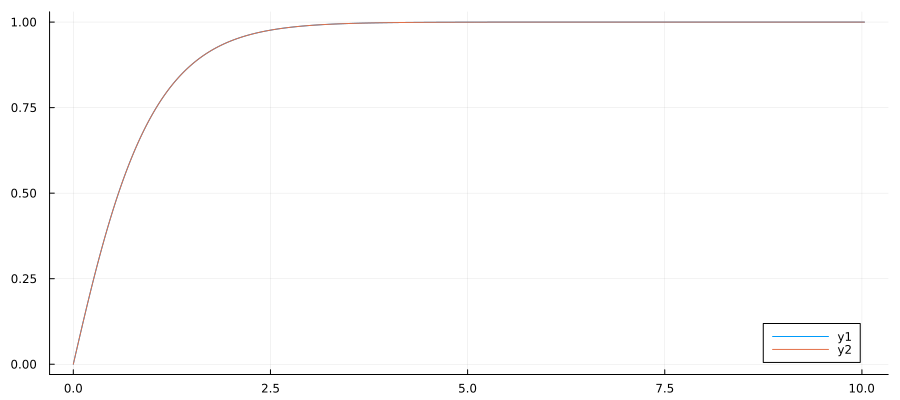

In [13]:
plot!(grid, [U_hartree,U_hartree_target])
plot!(size=(900,400))

In [15]:
error= MathUtils.error_difference(U_hartree,U_hartree_target)

9.434430007985173e-8